In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df1=pd.read_csv('user_interactions.csv')
df2=pd.read_csv('purchase_data.csv')
df3=pd.read_csv('website_performance.csv')

In [12]:
df1.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [32]:
df1.isnull().sum()

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64

In [ ]:
#indicates there are no null values in user interaction data

In [15]:

# Group by 'Page_Viewed' and calculate total visits and average time spent
page_stats = df1.groupby('Page_Viewed').agg(total_visits=('User_ID', 'count'), avg_time_spent=('Time_Spent_Seconds', 'mean'))

# Sort the results by total visits in descending order
most_visited_pages = page_stats.sort_values(by='total_visits', ascending=False)

# Print the most visited pages and average time spent
print(most_visited_pages)


               total_visits  avg_time_spent
Page_Viewed                                
Homepage               1045      310.215311
Cart Page              1041      302.819404
Checkout Page           989      306.760364
Category Page           972      297.839506
Product Page            953      304.562434


In [20]:
# Create a dictionary to map page categories to their respective sections
page_categories = {
    'Homepage': 'Main Page',
    'Category Page': 'Product Categories',
    'Cart Page': 'Shopping Cart'
}

# Add a new column to the DataFrame to represent page sections
df1['Page_Section'] = df1['Page_Viewed'].map(page_categories)

# Group by 'Page_Section' and calculate the click-through rate
section_stats = df1.groupby('Page_Section').agg(total_visits=('User_ID', 'count'))
total_visits = df1['User_ID'].count()

# Calculate click-through rate (CTR)
section_stats['CTR'] = section_stats['total_visits'] / total_visits

# Print the click-through rate for different sections
print(section_stats)


                    total_visits     CTR
Page_Section                            
Main Page                   1045  0.2090
Product Categories           972  0.1944
Shopping Cart               1041  0.2082


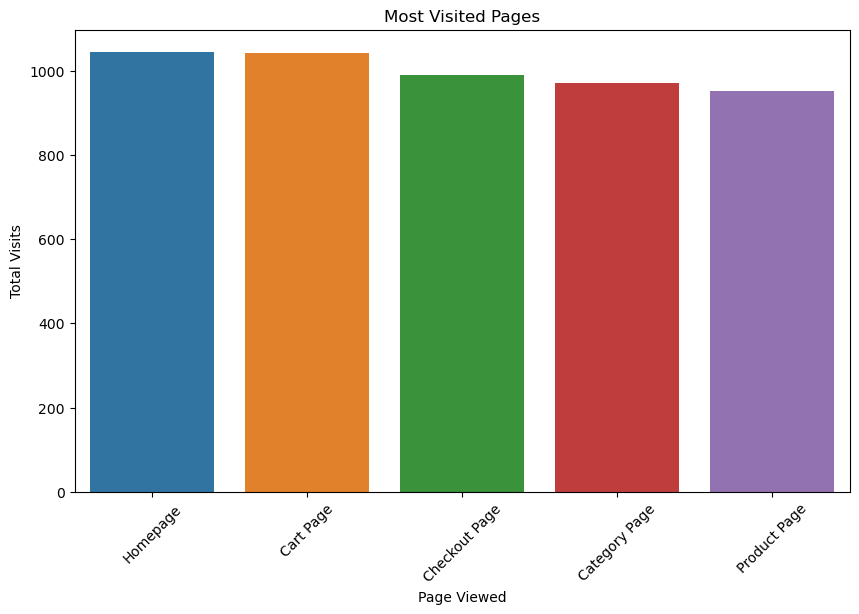

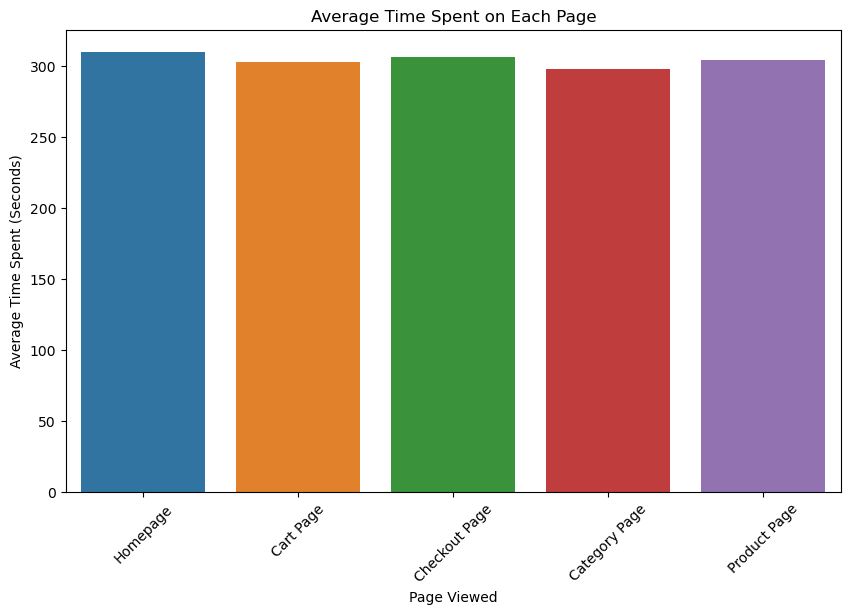

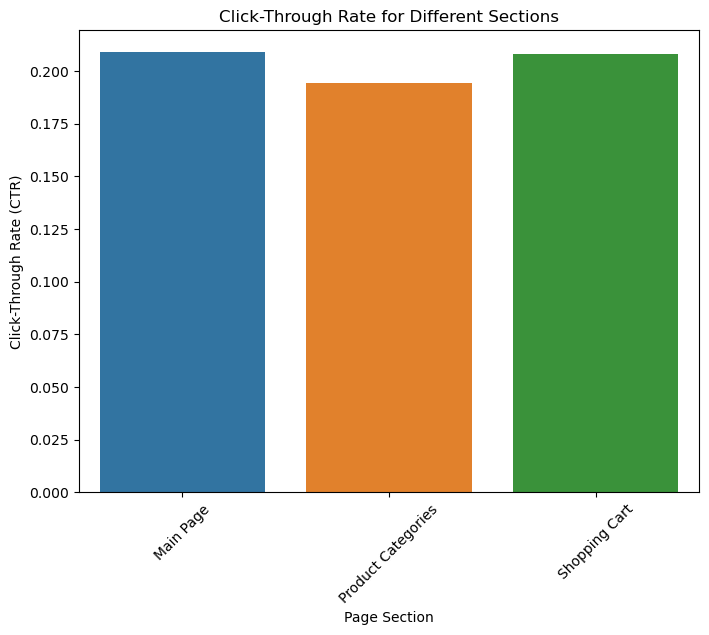

In [21]:

# Visualization for most visited pages
plt.figure(figsize=(10, 6))
sns.barplot(x=most_visited_pages.index, y='total_visits', data=most_visited_pages)
plt.xlabel('Page Viewed')
plt.ylabel('Total Visits')
plt.title('Most Visited Pages')
plt.xticks(rotation=45)
plt.show()

# Visualization for average time spent on each page
plt.figure(figsize=(10, 6))
sns.barplot(x=most_visited_pages.index, y='avg_time_spent', data=most_visited_pages)
plt.xlabel('Page Viewed')
plt.ylabel('Average Time Spent (Seconds)')
plt.title('Average Time Spent on Each Page')
plt.xticks(rotation=45)
plt.show()

# Visualization for click-through rate for different sections
plt.figure(figsize=(8, 6))
sns.barplot(x=section_stats.index, y='CTR', data=section_stats)
plt.xlabel('Page Section')
plt.ylabel('Click-Through Rate (CTR)')
plt.title('Click-Through Rate for Different Sections')
plt.xticks(rotation=45)
plt.show()


In [22]:
df2.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23


In [26]:
df2.isnull().sum()

Purchase_ID               0
User_ID                   0
Product_ID                0
Transaction_Amount        0
Purchase_Time             0
Interactions_Count        0
Likelihood_of_Purchase    0
dtype: int64

In [ ]:
#indicates there are no null values present in purchase data

In [24]:

# Calculate the overall conversion rate for the website
total_purchases = df2.shape[0]  # Total number of purchases
total_visits = df2['User_ID'].nunique()  # Total number of unique visitors (interactions)
conversion_rate = (total_purchases / total_visits) * 100

# Identify the top-selling products and product categories
top_selling_products = df2.groupby('Product_ID')['Transaction_Amount'].sum().nlargest(5)


# Explore the relationship between interactions and likelihood of purchase
# First, create a new DataFrame to represent user interactions count
user_interactions_count = df2['User_ID'].value_counts().reset_index()
user_interactions_count.columns = ['User_ID', 'Interactions_Count']

# Merge the interaction count with the original DataFrame
df2 = df2.merge(user_interactions_count, on='User_ID')

# Calculate the likelihood of a purchase for each user
df2['Likelihood_of_Purchase'] = (df2['Transaction_Amount'].notnull() * 100) / df2['Interactions_Count']

# Print the results
print("Overall Conversion Rate: {:.2f}%".format(conversion_rate))
print("\nTop Selling Products:")
print(top_selling_products)
print("\nRelationship between Interactions and Likelihood of Purchase:")
print(df2[['User_ID', 'Interactions_Count', 'Likelihood_of_Purchase']].head())


Overall Conversion Rate: 109.17%

Top Selling Products:
Product_ID
Product_19    7125.056901
Product_17    6711.316153
Product_13    6680.243756
Product_3     6375.983900
Product_20    6359.302691
Name: Transaction_Amount, dtype: float64

Relationship between Interactions and Likelihood of Purchase:
     User_ID  Interactions_Count  Likelihood_of_Purchase
0  User_3840                   1              100.000000
1  User_1846                   3               33.333333
2  User_1846                   3               33.333333
3  User_1846                   3               33.333333
4  User_1700                   3               33.333333


In [29]:
df3.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [30]:
df3.isnull().sum()

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64

In [ ]:
# No null values present in website data

In [34]:
# Websites with high bounce rates

df3_sorted = df3.sort_values(by='Bounce_Rate', ascending=False)

In [35]:
df3_sorted

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
9,2023-10-01,2.468395,0.566843,0.065971
4,2023-05-01,9.872398,0.542407,0.089525
10,2023-11-01,4.429745,0.526560,0.065786
0,2023-01-01,5.106652,0.514345,0.047375
7,2023-08-01,7.115272,0.489165,0.038263
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
5,2023-06-01,7.333456,0.440715,0.048687
6,2023-07-01,3.372264,0.390081,0.048440
11,2023-12-01,5.289363,0.388364,0.082828


In [ ]:
# By identifying the pages with high bounce rates and we have to analyze the reasons behind the bounce. 
# If we identify the root causes we can improve the content, design, and user experience of those pages-
#-to reduce bounce rates.

C:\Users\Win 10\AppData\Local\Temp\ipykernel_20412\2789369625.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_values = df3.mean()


Average Page Load Time: 5.866266048900847
Average Bounce Rate: 0.4526503154628032
Average Conversion Rate: 0.060055897097265006


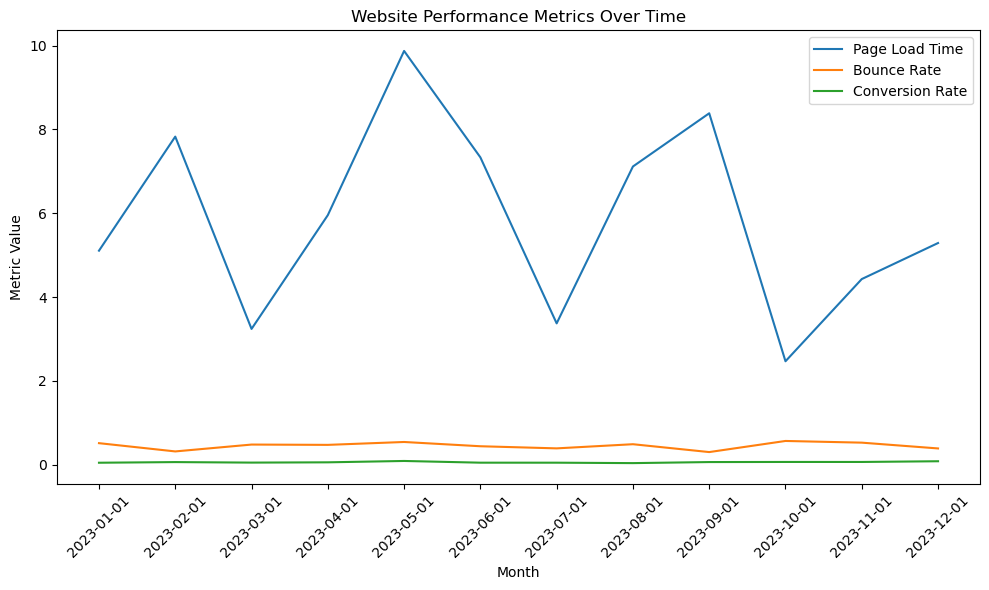

In [31]:
# Calculate average values
average_values = df3.mean()

# Print average values
print("Average Page Load Time:", average_values['Page_Load_Time'])
print("Average Bounce Rate:", average_values['Bounce_Rate'])
print("Average Conversion Rate:", average_values['Conversion_Rate'])

# Line plot for performance metrics over time
plt.figure(figsize=(10, 6))
plt.plot(df3['Month'], df3['Page_Load_Time'], label='Page Load Time')
plt.plot(df3['Month'], df3['Bounce_Rate'], label='Bounce Rate')
plt.plot(df3['Month'], df3['Conversion_Rate'], label='Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Metric Value')
plt.title('Website Performance Metrics Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# I don't have the data for cohort analysis such as user registration details etc. So I am skipping it.